#### Importing modules

In [5]:
import pandas as pd

#### Importing dataset

In [6]:
file_path = 'housing.csv'  

data = pd.read_csv(file_path, delimiter='\s+', header=None)

#### Setting column names

In [7]:
    column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns = column_names

In [8]:
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


#### Splitting training and test data

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handle missing values (if any)
data = data.dropna()

# Split the data into features and target variable
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Perform feature scaling and normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


#### As the model enhances on data calculation we go for Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Implement and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 3.1890919658878487
Mean Squared Error: 24.29111947497351


#### Analysis of result

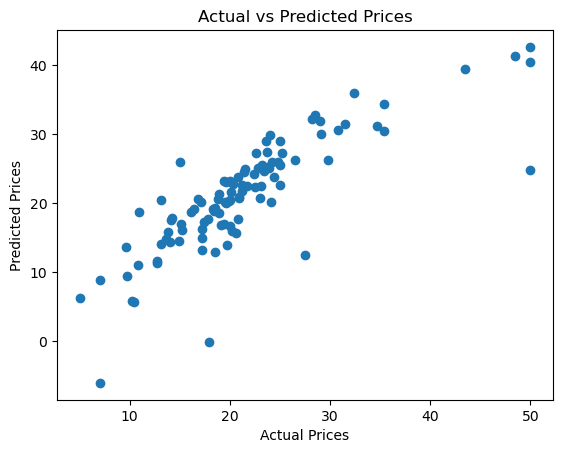

    Feature  Coefficient
0      CRIM    -0.971494
1        ZN     0.701556
2     INDUS     0.276752
3      CHAS     0.706532
4       NOX    -1.991430
5        RM     3.115718
6       AGE    -0.177060
7       DIS    -3.045771
8       RAD     2.282785
9       TAX    -1.792605
10  PTRATIO    -1.979954
11        B     1.126499
12    LSTAT    -3.628149


In [11]:
import matplotlib.pyplot as plt

# Visualize the model's performance
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Interpret the model's coefficients
coef = model.coef_
feature_importance = pd.DataFrame({'Feature': column_names[:-1], 'Coefficient': coef})
print(feature_importance)


#### Some important metrics below

In [12]:
coef = model.coef_
coef

array([-0.97149423,  0.70155562,  0.27675212,  0.70653152, -1.99143043,
        3.11571836, -0.17706021, -3.04577065,  2.28278471, -1.79260468,
       -1.97995351,  1.12649864, -3.62814937])

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

# Define a threshold for binary classification (e.g., median of actual prices)
threshold = y.median()

# Convert regression predictions to binary
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Calculate precision
precision = precision_score(y_test_binary, y_pred_binary) * 100
print(f'Precision: {precision:.2f}%')

# Calculate recall
recall = recall_score(y_test_binary, y_pred_binary) * 100
print(f'Recall: {recall:.2f}%')

# Calculate F1 score
f1 = f1_score(y_test_binary, y_pred_binary) * 100
print(f'F1 Score: {f1:.2f}%')

# Calculate F2 score
f2 = fbeta_score(y_test_binary, y_pred_binary, beta=2) * 100
print(f'F2 Score: {f2:.2f}%')


Accuracy: 87.25%
Precision: 79.59%
Recall: 92.86%
F1 Score: 85.71%
F2 Score: 89.86%


#### Distribution of features and Correlation Matrix

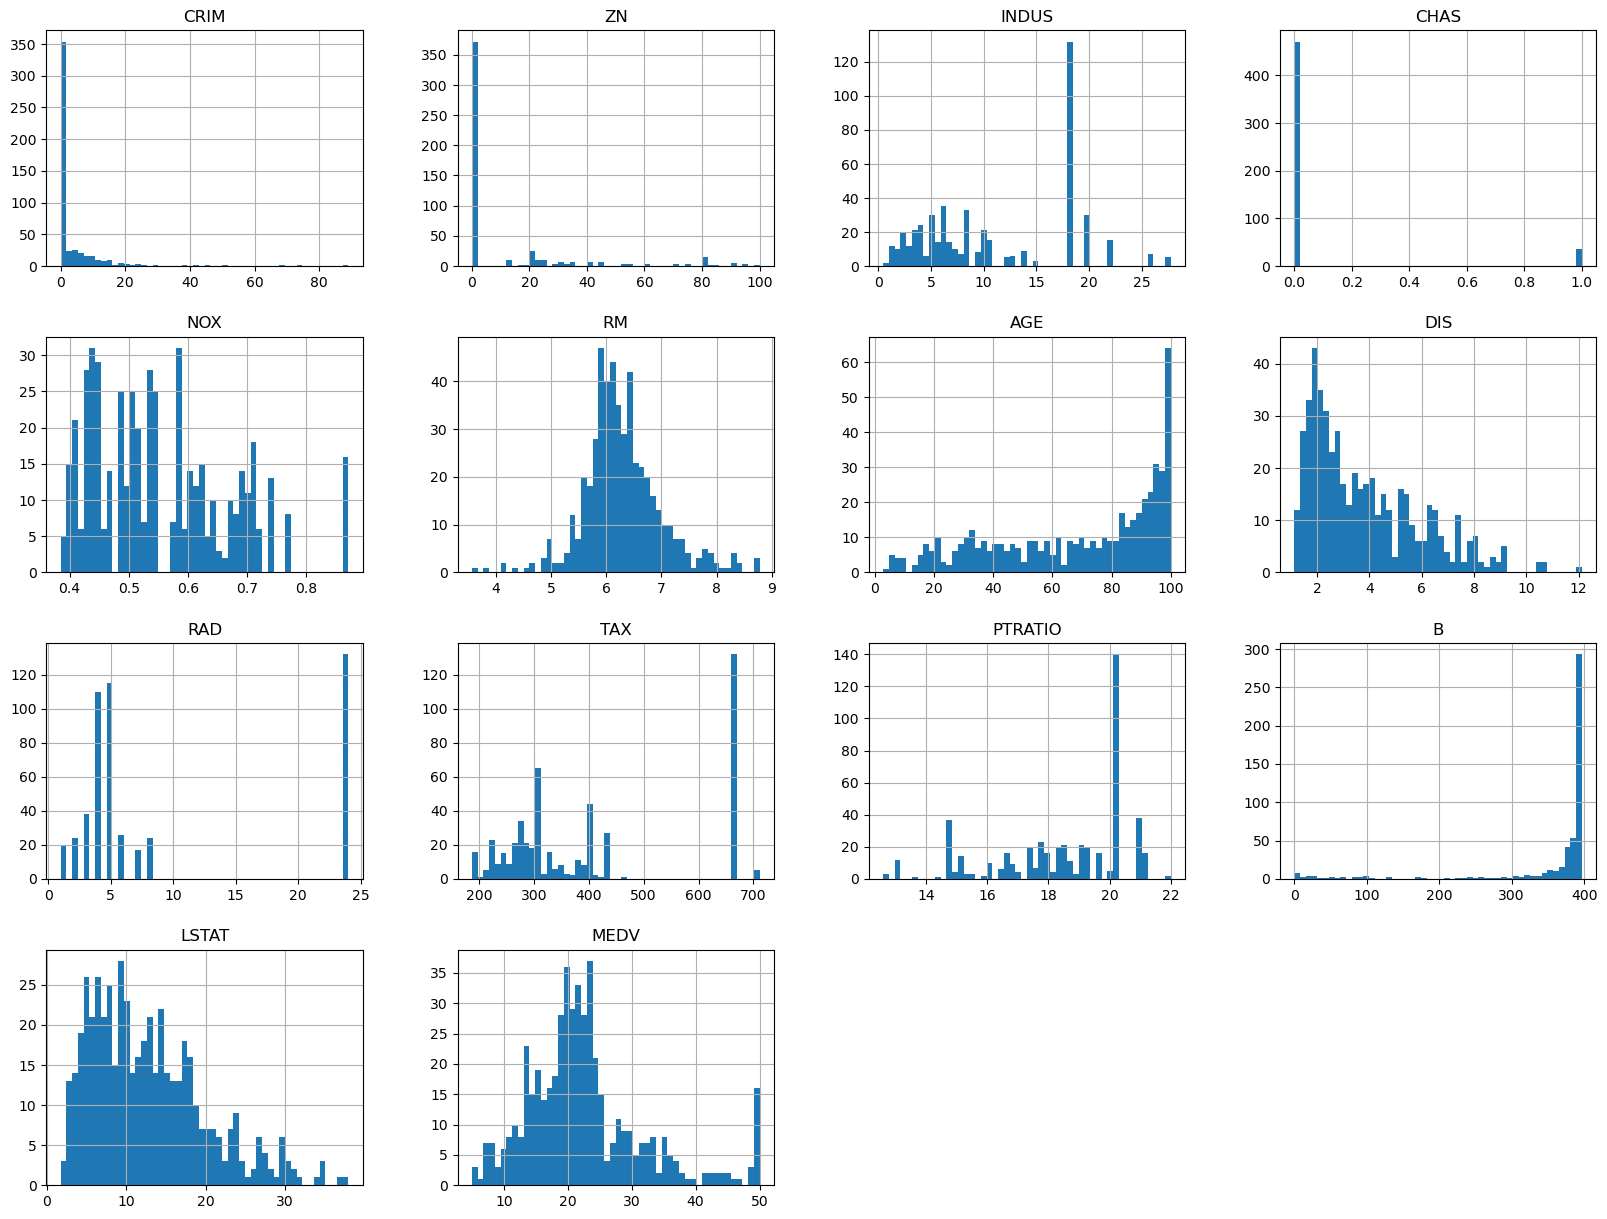

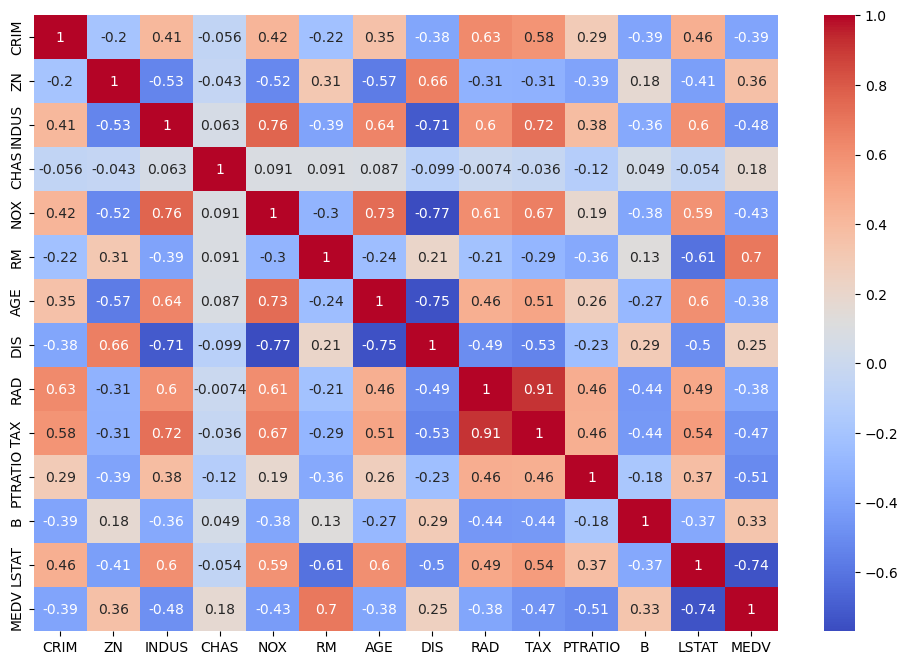

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of features
data.hist(bins=50, figsize=(20, 15))
plt.show()

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


#### Combining Feature Scaling and Linear Regression
#### Performing Hyperparameter Tuning
#### Results to selection and output the Best Model

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('lr', LinearRegression())     # Linear regression model
])

# Define the parameter grid
param_grid = {
    'lr__fit_intercept': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (neg_mean_squared_error):", grid_search.best_score_)


Best Parameters: {'lr__fit_intercept': True}
Best Score (neg_mean_squared_error): -23.65441827030464


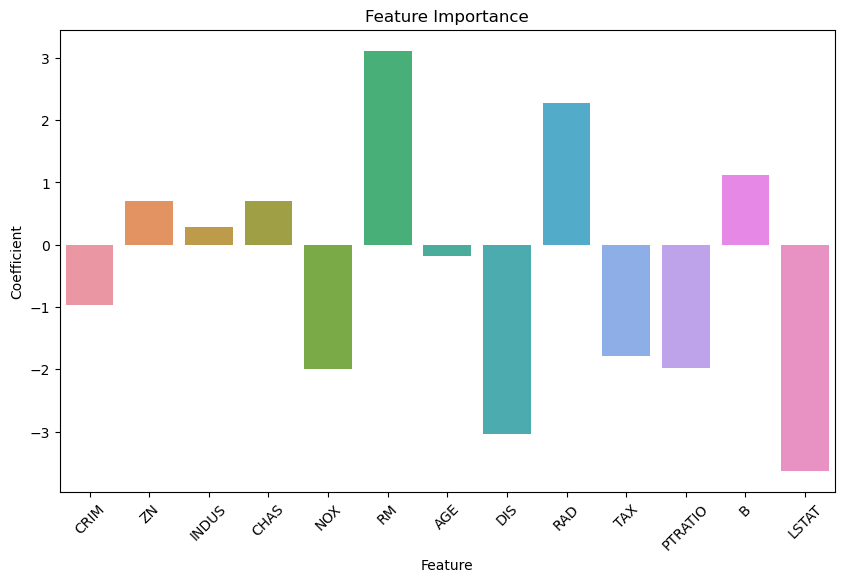

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Feature'], y=feature_importance['Coefficient'])
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.show()


#### Here we focus on on important features that play vital role in producing the output

## PCA

Best Parameters: {'lr__fit_intercept': True, 'pca__n_components': None}
Best Score (neg_mean_squared_error): -23.65441827030465
R² Score: 0.668759493535632
Mean Absolute Error: 3.18909196588785
Mean Squared Error: 24.29111947497352


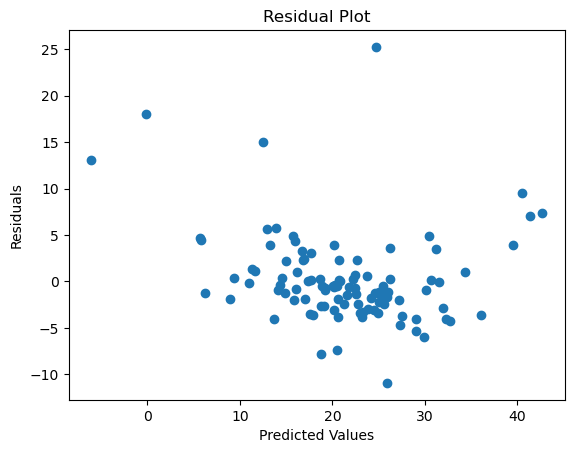

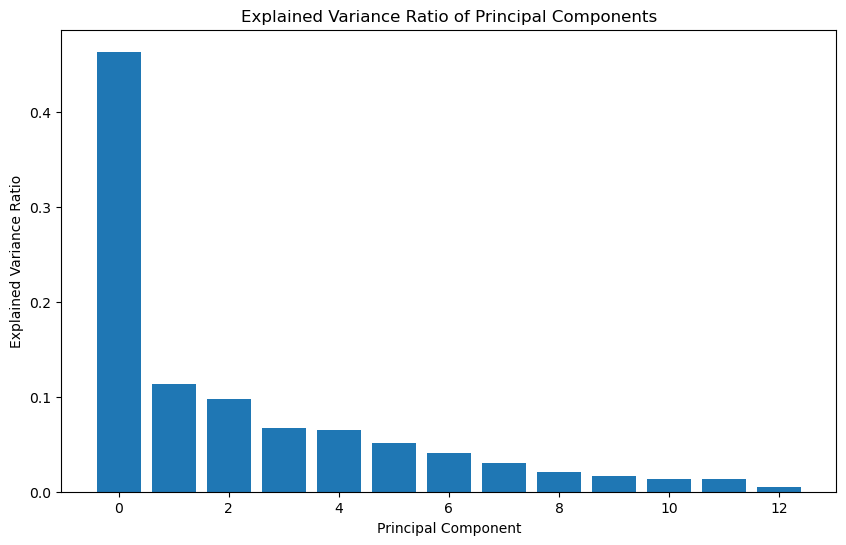

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Define the pipeline with StandardScaler, PCA, and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('pca', PCA()),                # PCA for dimensionality reduction
    ('lr', LinearRegression())     # Linear regression model
])

# Define the parameter grid
param_grid = {
    'pca__n_components': [5, 10, None],  # Try reducing to 5 or 10 principal components, or use all
    'lr__fit_intercept': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (neg_mean_squared_error):", grid_search.best_score_)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Feature Importance (for PCA, we look at the components)
pca_components = best_model.named_steps['pca'].components_
pca_variance = best_model.named_steps['pca'].explained_variance_ratio_

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(len(pca_variance)), pca_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()


#### From above graph we find most important feature with respect to the dataset

#### Additional Data Preprocessing:

In [19]:
# Detecting and Handling Outliers
import numpy as np

def remove_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df

for column in ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']:
    data = remove_outliers(data, column)


In [20]:
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

#### Model Comparison

In [21]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Train multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} - MAE: {mean_absolute_error(y_test, y_pred)}, MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}')


Linear Regression - MAE: 3.1890919658878487, MSE: 24.29111947497351, R2: 0.6687594935356321
Decision Tree - MAE: 2.696078431372549, MSE: 22.464705882352938, R2: 0.6936649806646358
Random Forest - MAE: 2.0997058823529415, MSE: 8.850367333333336, R2: 0.8793139130162617
Gradient Boosting - MAE: 1.9306615700252658, MSE: 6.312355753680876, R2: 0.9139229495377219


#### Feature Importance Visualization:    Random Forest

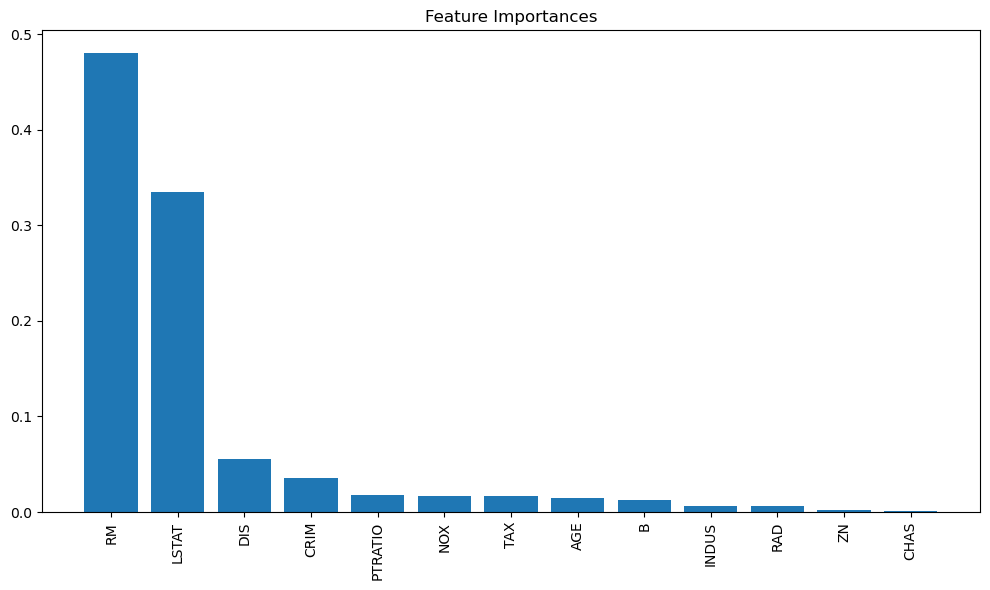

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor


feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Random Forest feature importance
rf_model = RandomForestRegressor().fit(X_train, y_train)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


#### Adding interaction terms or polynomial features.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly

array([[ 1.32780421e+00, -4.87722365e-01,  1.01599907e+00, ...,
         6.22172953e-03, -1.35520284e-01,  2.95187173e+00],
       [-3.47506015e-01, -4.87722365e-01, -4.37258013e-01, ...,
         1.82343991e-01, -2.50384220e-01,  3.43813125e-01],
       [-4.16483921e-01,  1.01446252e+00, -7.40749452e-01, ...,
         3.73772244e-03, -4.13326524e-02,  4.57066618e-01],
       ...,
       [-4.18770655e-01,  2.94584308e+00, -1.33168230e+00, ...,
         1.41153764e-01, -3.50902904e-01,  8.72331311e-01],
       [ 8.78254408e-01, -4.87722365e-01,  1.01599907e+00, ...,
         7.32388180e+00, -4.02751057e+00,  2.21478744e+00],
       [-3.93895877e-01, -4.87722365e-01, -3.75976088e-01, ...,
         9.82462214e+00,  8.88861678e-01,  8.04178594e-02]])

#### Hyperparameter Tuning

In [25]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
random_search = RandomizedSearchCV(RandomForestRegressor(), param_dist, cv=5, scoring='neg_mean_squared_error', n_iter=10)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_squared_error')

In [ ]:
pip install shap


#### Model Interpretation

In [26]:
import shap
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor


#### Adaboost with grid search cross validation

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

Best Parameters for AdaBoost: {'ada__learning_rate': 0.1, 'ada__n_estimators': 50}
Best Score for AdaBoost (neg_mean_squared_error): -17.66874225658434
Best Parameters for Gradient Boosting: {'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__n_estimators': 100}
Best Score for Gradient Boosting (neg_mean_squared_error): -12.948473553630695
Linear Regression - MAE: 3.19, MSE: 24.29
Random Forest - MAE: 2.03, MSE: 10.54
AdaBoost - MAE: 2.34, MSE: 8.76
Gradient Boosting - MAE: 1.92, MSE: 6.24


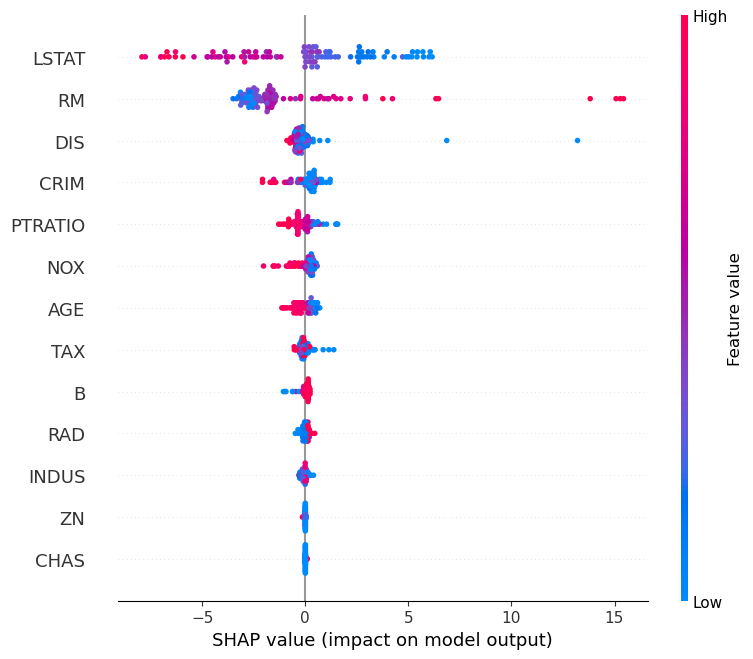

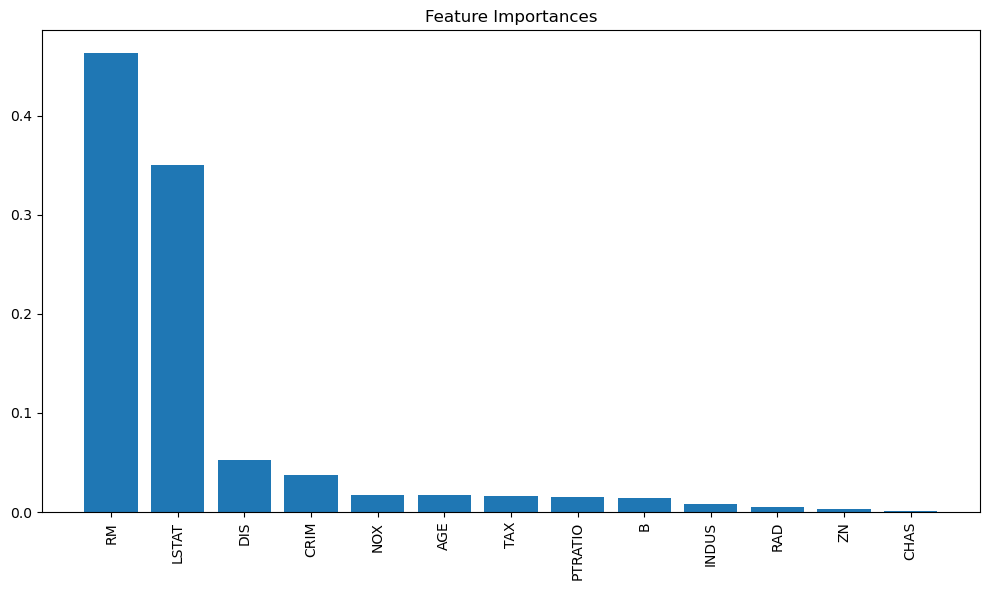

In [27]:
# Linear Regression with GridSearchCV
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
param_grid_lr = {'lr__fit_intercept': [True, False]}
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train, y_train)
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

# Random Forest Regressor with GridSearchCV
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor())
])
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_features': ['auto', 'sqrt', 'log2']
}
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# AdaBoost Regressor with GridSearchCV
pipeline_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostRegressor())
])
param_grid_ada = {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0]
}
grid_search_ada = GridSearchCV(pipeline_ada, param_grid_ada, cv=5, scoring='neg_mean_squared_error')
grid_search_ada.fit(X_train, y_train)
best_model_ada = grid_search_ada.best_estimator_
y_pred_ada = best_model_ada.predict(X_test)

print("Best Parameters for AdaBoost:", grid_search_ada.best_params_)
print("Best Score for AdaBoost (neg_mean_squared_error):", grid_search_ada.best_score_)

# Gradient Boosting Regressor with GridSearchCV
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingRegressor())
])
param_grid_gb = {
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1, 1.0],
    'gb__max_depth': [3, 4, 5]
}
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)
best_model_gb = grid_search_gb.best_estimator_
y_pred_gb = best_model_gb.predict(X_test)

print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Score for Gradient Boosting (neg_mean_squared_error):", grid_search_gb.best_score_)

# Calculate metrics for each model
models = {
    'Linear Regression': (y_test, y_pred_lr),
    'Random Forest': (y_test, y_pred_rf),
    'AdaBoost': (y_test, y_pred_ada),
    'Gradient Boosting': (y_test, y_pred_gb)
}

for model_name, (y_true, y_pred) in models.items():
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f'{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}')

# SHAP analysis for Random Forest
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=column_names[:-1])

# Random Forest feature importance
rf_model = RandomForestRegressor().fit(X_train, y_train)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [column_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [28]:
# AdaBoost Regressor with GridSearchCV
pipeline_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostRegressor())
])
param_grid_ada = {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0]
}
grid_search_ada = GridSearchCV(pipeline_ada, param_grid_ada, cv=5, scoring='neg_mean_squared_error')
grid_search_ada.fit(X_train, y_train)
best_model_ada = grid_search_ada.best_estimator_
y_pred_ada = best_model_ada.predict(X_test)

print("Best Parameters for AdaBoost:", grid_search_ada.best_params_)
print("Best Score for AdaBoost (neg_mean_squared_error):", grid_search_ada.best_score_)


Best Parameters for AdaBoost: {'ada__learning_rate': 1.0, 'ada__n_estimators': 50}
Best Score for AdaBoost (neg_mean_squared_error): -17.288894153399145
